## 5.5 Handwritten digit classification

### (a) Training

I chose gradient ascent to perform the logistic regression.
- learning rate: $\eta=\frac{0.2}{T}$
- the fitting will stop whenever the chage in the log-likelihood is smaller than a given threshold (i.e. 0.0001)
- Every 100 iterations, the fit function will print info including the current log-likelihood, error signal, error rate, etc

In [1]:
import numpy as np

train3 = np.loadtxt('train3.txt', dtype=int)
train5 = np.loadtxt('train5.txt', dtype=int)

In [2]:
train3.shape

(700, 64)

In [3]:
train3 = np.concatenate((train3, np.zeros(train3.shape[0])[:,np.newaxis]), axis=1)
train5 = np.concatenate((train5, np.ones(train5.shape[0])[:,np.newaxis]), axis=1)

In [4]:
train3.shape

(700, 65)

In [5]:
train_set = np.concatenate((train3, train5))
train_set.shape

(1400, 65)

In [6]:
np.random.shuffle(train_set)
X_train = train_set[:,:-1]
y_train = train_set[:,-1:][:,0]

In [7]:
X_train.shape

(1400, 64)

In [8]:
y_train.shape

(1400,)

In [9]:
def sigmoid(w, xt):
    z = np.dot(w, xt)
    return 1 / (1 + np.exp(-z))

def log_likelihood(yt, sig):
    return yt * np.log(sig) + (1-yt) * np.log((1-sig))

def gradient(yt, w, xt):
    # shape(d,1)
    return (yt-sigmoid(w, xt)) * xt

In [10]:
import math

def fit(X, y, w, eta, threshold):
    T = X.shape[0]
    L = [] # log-likelihoods
    ER = [] # error rates
    ES = [] # error signals
    diff_l = math.inf
    counter = 0
    while diff_l > threshold:
        Lt = 0
        dLt = np.zeros(len(w))
        correctness = 0
        error_signal = 0
        for t in range(T):
            sig = sigmoid(w, X[t])
            Lt += log_likelihood(y[t], sig)
            dLt += gradient(y[t], w, X[t])
            error_signal += y[t] - sig
            if sig > 0.5 and y[t] == 1 or sig < 0.5 and y[t] == 0:
                correctness += 1
        error_rate = (T - correctness) / (T * 1.0)
        w += eta * dLt
        if counter % 100 == 0:
            print('iteration=%d\tlog_likelihood=%.5f\terror_signal=%.5f\terror_rate=%.5f%%' % (counter, Lt, error_signal, error_rate * 100))
        L.append(Lt)
        ER.append(error_rate)
        ES.append(error_signal)
        if len(L) > 1:
            diff_l = abs(L[-1]-L[-2])
        counter += 1
    return w, L, ER, ES

In [11]:
T = X_train.shape[0]
w = np.zeros(X_train.shape[1])
w, L, ER, ES = fit(X_train, y_train, w, 0.2 / T, 0.0001)

iteration=0	log_likelihood=-970.40605	error_signal=0.00000	error_rate=100.00000%
iteration=100	log_likelihood=-296.25898	error_signal=6.56854	error_rate=5.92857%
iteration=200	log_likelihood=-247.32210	error_signal=5.63667	error_rate=5.07143%
iteration=300	log_likelihood=-226.47560	error_signal=5.16408	error_rate=5.00000%
iteration=400	log_likelihood=-214.41210	error_signal=4.83803	error_rate=4.92857%
iteration=500	log_likelihood=-206.36969	error_signal=4.58698	error_rate=4.85714%
iteration=600	log_likelihood=-200.54279	error_signal=4.38299	error_rate=4.71429%
iteration=700	log_likelihood=-196.08162	error_signal=4.21188	error_rate=4.42857%
iteration=800	log_likelihood=-192.52916	error_signal=4.06524	error_rate=4.50000%
iteration=900	log_likelihood=-189.61598	error_signal=3.93762	error_rate=4.42857%
iteration=1000	log_likelihood=-187.17222	error_signal=3.82522	error_rate=4.28571%
iteration=1100	log_likelihood=-185.08504	error_signal=3.72526	error_rate=4.28571%
iteration=1200	log_likelih

In [12]:
ER[-1]

0.037142857142857144

Text(0, 0.5, 'Log-likelihood')

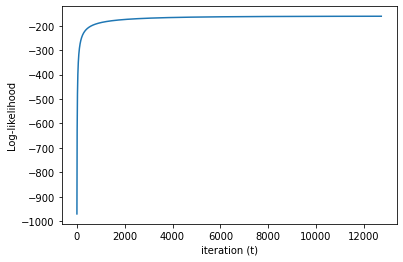

In [13]:
import matplotlib.pyplot as plt
plt.plot(L)
plt.xlabel("iteration (t)")
plt.ylabel("Log-likelihood")

Text(0, 0.5, 'Error Rate')

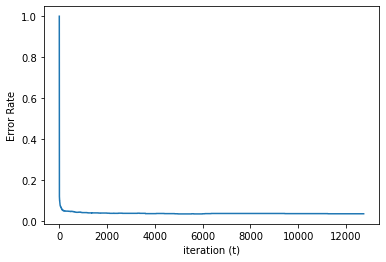

In [14]:
plt.plot(ER)
plt.xlabel("iteration (t)")
plt.ylabel("Error Rate")

Text(0, 0.5, 'Error Signal')

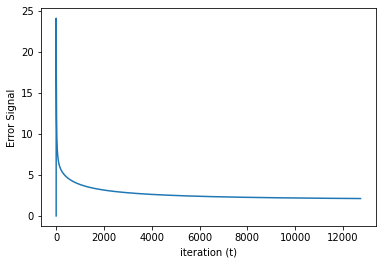

In [15]:
plt.plot(ES)
plt.xlabel("iteration (t)")
plt.ylabel("Error Signal")

In [16]:
w_print = np.round(np.split(w, 8), 5)
print(w_print)

[[-0.81488 -1.63752 -1.14416 -1.38995 -0.65703 -1.05923  0.80218  1.88387]
 [-0.13666 -0.212    0.29423 -0.05451 -0.58342  0.90508 -1.42126 -1.42321]
 [ 4.09766  1.37746  1.54752  0.12786  0.90158 -2.29681 -2.43497 -2.78626]
 [ 0.75863  0.3623   0.73162 -0.35726 -0.48146 -2.61852  0.48784 -0.04934]
 [ 0.60163  1.24063  0.0827  -0.42278 -0.6466  -0.07539 -0.59596 -0.15237]
 [ 1.274   -0.26285 -0.38533 -0.19161  0.00638 -1.06615  0.96447 -1.74971]
 [ 1.62842 -0.73411  1.37208  0.67173  0.51117 -0.43045  0.15526 -1.53144]
 [ 0.67236  0.30753  0.89343  2.3278   0.47037  0.69581  0.82975 -0.5645 ]]


### (b) Testing

In [17]:
test3 = np.loadtxt('test3.txt', dtype=int)
test5 = np.loadtxt('test5.txt', dtype=int)
test3 = np.concatenate((test3, np.zeros(test3.shape[0])[:,np.newaxis]), axis=1)
test5 = np.concatenate((test5, np.ones(test5.shape[0])[:,np.newaxis]), axis=1)
test_set = np.concatenate((train3, train5))

In [18]:
X_test = test_set[:,:-1]
y_test = test_set[:,-1:][:,0]

In [19]:
def predict(X, w):
    return [1 if sigmoid(w,X[t]) > 0.5 else 0 for t in range(X.shape[0])]

pred = predict(X_test, w)

In [20]:
correctness = 0
for t in range(len(pred)):
    if pred[t] == y_test[t]:
        correctness += 1
error_rate = (len(pred) - correctness) / (len(pred) * 1.0)
print('The percent error rate is %.5f%%' % (error_rate * 100))

The percent error rate is 3.71429%
